In [128]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


Affine Layer
---

In [130]:
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape((num_inputs, *input_shape))
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.7698500479884e-10


In [131]:
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda z: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda z: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda z: affine_forward(x, w, b)[0], b, dout)

print('Testing affine_backward function:')
print('dx error: ', dx.shape, rel_error(dx_num, dx))
print('dw error: ', dw.shape, rel_error(dw_num, dw))
print('db error: ', db.shape, rel_error(db_num, db))

Testing affine_backward function:
dx error:  (10, 2, 3) 1.0908199508708189e-10
dw error:  (6, 5) 2.1752635504596857e-10
db error:  (5,) 7.736978834487815e-12


ReLU Layer
---

In [132]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


In [133]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda z: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


"Sandwich" Layer
---

In [134]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda z: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda z: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda z: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  6.395535042049294e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


Softmax and SVM
---

In [135]:
np.random.seed(231)
num_classes = 10
num_inputs = 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda z: svm_loss(x, y)[0], x)
loss, dx = svm_loss(x, y)

print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.999602749096233
dx error:  1.4021566006651672e-09


In [136]:
dx_num = eval_numerical_gradient(lambda z: softmax_loss(x, y)[0], x)
loss, dx = softmax_loss(x, y)

print('Testing softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


Two-layer Network
---

In [137]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

Testing initialization ... 


In [138]:
print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)

X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T 
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

Testing test-time forward pass ... 


In [139]:
print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

Testing training loss (no regularization)


In [140]:
print('Testing training loss (with regularization)')
model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

Testing training loss (with regularization)


In [141]:
for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)
    
    for name in sorted(grads):
        num_result = eval_numerical_gradient(lambda _: model.loss(X, y)[0], model.params[name])
        print('%s relative error: %.2e' % (name, rel_error(num_result, grads[name])))

Running numeric gradient check with reg =  0.0
W1 relative error: 1.22e-08
W2 relative error: 3.34e-10
b1 relative error: 4.73e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 1.37e-07
b1 relative error: 1.56e-08
b2 relative error: 9.09e-10


Solver
---

In [142]:
model = TwoLayerNet()

solver = Solver(model, data, 
               update_rule='sgd', optim_config={'learning_rate':1e-3},
               lr_decay=0.95, num_epoch=10, batch_size=100, print_every=100, verbose=False)
solver.train()


Epoch 10 / 10 - best_val_acc: 0.528000


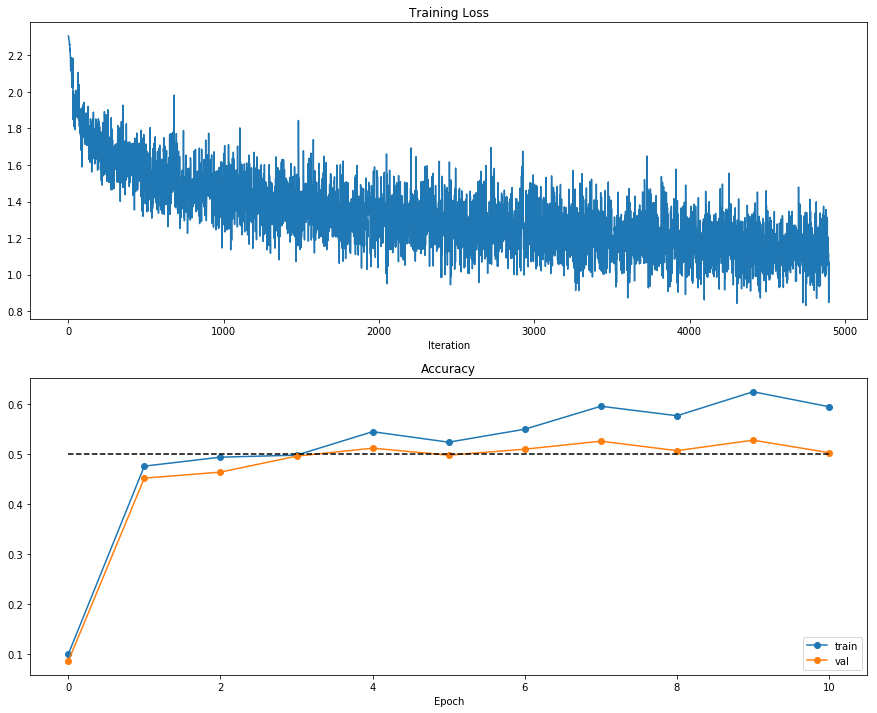

In [143]:
plt.subplot(2, 1, 1)
plt.title('Training Loss')
plt.plot(solver.loss_history)
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

Multilayer Network
---

In [144]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

weight_scale = 5e-2
model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C, reg=reg, weight_scale=weight_scale, dtype=np.float64)

print('Checking initialization ...')
for name in model.params:
    print(name, model.params[name].shape)
    if name.startswith('W'):
        rel_err = abs(model.params[name].std() - weight_scale)
        assert rel_err < weight_scale / 10, 'Weight %s do not seem right' % name
    elif name.startswith('b'):
        assert np.all(model.params[name] == 0), 'Bias %s do not seem right' % name
    else:
        pass



Checking initialization ...
W1 (15, 20)
b1 (20,)
W2 (20, 30)
b2 (30,)
W3 (30, 10)
b3 (10,)


In [145]:
for reg in [0.0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C, reg=reg, weight_scale=weight_scale, dtype=np.float64)
    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        num_grad = eval_numerical_gradient(f, model.params[name])
        print('%s relative error: %.2e' % (name, rel_error(num_grad, grads[name])))

Running check with reg =  0.0
Initial loss:  2.3018424948058516
W1 relative error: 2.12e-07
W2 relative error: 1.75e-06
W3 relative error: 1.47e-07
b1 relative error: 1.70e-08
b2 relative error: 3.96e-09
b3 relative error: 1.74e-10
Running check with reg =  3.14
Initial loss:  6.946521259943193
W1 relative error: 2.81e-07
W2 relative error: 1.83e-07
W3 relative error: 1.24e-08
b1 relative error: 6.99e-09
b2 relative error: 6.91e-09
b3 relative error: 2.04e-10


Iteration 1 / 40 - loss: 2.315747
Epoch 0 / 20 - train acc: 0.260000; val_acc: 0.114000
Epoch 1 / 20 - train acc: 0.300000; val_acc: 0.137000
Epoch 2 / 20 - train acc: 0.420000; val_acc: 0.170000
Epoch 3 / 20 - train acc: 0.480000; val_acc: 0.170000
Epoch 4 / 20 - train acc: 0.480000; val_acc: 0.148000
Epoch 5 / 20 - train acc: 0.460000; val_acc: 0.172000
Iteration 11 / 40 - loss: 1.617476
Epoch 6 / 20 - train acc: 0.680000; val_acc: 0.166000
Epoch 7 / 20 - train acc: 0.680000; val_acc: 0.171000
Epoch 8 / 20 - train acc: 0.720000; val_acc: 0.170000
Epoch 9 / 20 - train acc: 0.740000; val_acc: 0.185000
Epoch 10 / 20 - train acc: 0.820000; val_acc: 0.184000
Iteration 21 / 40 - loss: 1.019385
Epoch 11 / 20 - train acc: 0.880000; val_acc: 0.192000
Epoch 12 / 20 - train acc: 0.860000; val_acc: 0.186000
Epoch 13 / 20 - train acc: 0.900000; val_acc: 0.190000
Epoch 14 / 20 - train acc: 0.900000; val_acc: 0.173000
Epoch 15 / 20 - train acc: 0.900000; val_acc: 0.176000
Iteration 31 / 40 - loss: 

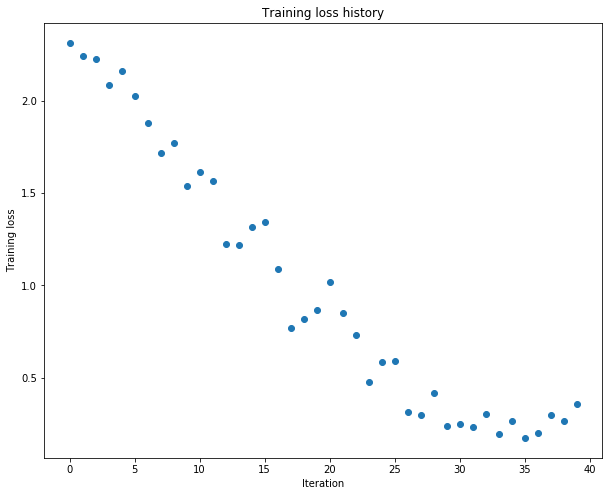

In [193]:
num_train = 50
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

weight_scale = 1e-2
learning_rate = 0.86e-2

model = FullyConnectedNet([100, 100], weight_scale=weight_scale)

solver = Solver(model, small_data,
               print_every=10, num_epoch=20, batch_size=25,
               update_rule='sgd', optim_config={'learning_rate': learning_rate})

solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Iteration 1 / 40 - loss: 2.302634
Epoch 0 / 20 - train acc: 0.140000; val_acc: 0.076000
Epoch 1 / 20 - train acc: 0.160000; val_acc: 0.080000
Epoch 2 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 3 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 4 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 5 / 20 - train acc: 0.160000; val_acc: 0.079000
Iteration 11 / 40 - loss: 2.301294
Epoch 6 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 7 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 8 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 9 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 10 / 20 - train acc: 0.160000; val_acc: 0.079000
Iteration 21 / 40 - loss: 2.300651
Epoch 11 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 12 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 13 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 14 / 20 - train acc: 0.160000; val_acc: 0.079000
Epoch 15 / 20 - train acc: 0.160000; val_acc: 0.079000
Iteration 31 / 40 - loss: 

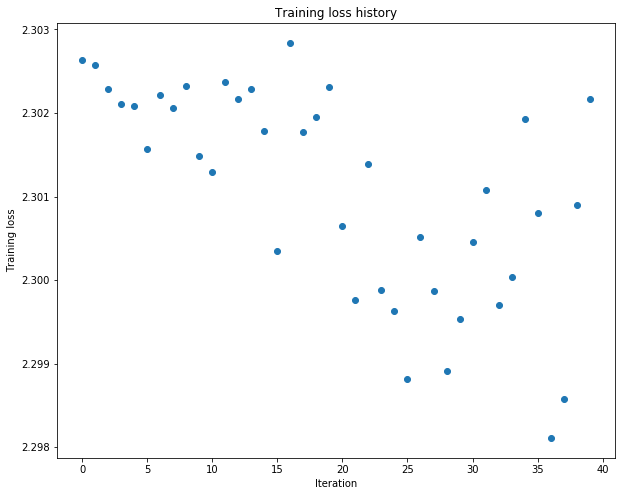

In [244]:
num_train = 50
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

weight_scale = 1e-2
learning_rate = 1.1e-2

model = FullyConnectedNet([100, 100, 100, 100], weight_scale=weight_scale)

solver = Solver(model, small_data,
               print_every=10, num_epoch=20, batch_size=25,
               update_rule='sgd', optim_config={'learning_rate': learning_rate})

solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

SGD + Momentum
---

In [245]:
from cs231n.optim import sgd_momentum

In [266]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


In [247]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=2e-2)
    
    solver = Solver(model, small_data, num_epoch=5, batch_size=100,
                   update_rule=update_rule, optim_config={'learning_rate': 1e-2}, verbose=True)
    
    solvers[update_rule] = solver
    solver.train()
    print()

running with  sgd
Iteration 1 / 200 - loss: 2.302348
Epoch 0 / 5 - train acc: 0.125000; val_acc: 0.115000
Epoch 1 / 5 - train acc: 0.114000; val_acc: 0.085000
Epoch 2 / 5 - train acc: 0.142000; val_acc: 0.108000
Iteration 101 / 200 - loss: 2.302960
Epoch 3 / 5 - train acc: 0.121000; val_acc: 0.125000
Epoch 4 / 5 - train acc: 0.173000; val_acc: 0.149000
Epoch 5 / 5 - train acc: 0.151000; val_acc: 0.152000
Epoch 5 / 5 - best_val_acc: 0.152000

running with  sgd_momentum
Iteration 1 / 200 - loss: 2.302170
Epoch 0 / 5 - train acc: 0.089000; val_acc: 0.089000
Epoch 1 / 5 - train acc: 0.114000; val_acc: 0.111000
Epoch 2 / 5 - train acc: 0.118000; val_acc: 0.139000
Iteration 101 / 200 - loss: 2.163018
Epoch 3 / 5 - train acc: 0.166000; val_acc: 0.162000
Epoch 4 / 5 - train acc: 0.204000; val_acc: 0.189000
Epoch 5 / 5 - train acc: 0.282000; val_acc: 0.258000
Epoch 5 / 5 - best_val_acc: 0.258000



RMSProp and Adam
---

In [249]:
from cs231n.optim import rmsprop

In [261]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  9.524687511038133e-08
cache error:  2.6477955807156126e-09


In [278]:
from cs231n.optim import adam

In [283]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm':m, 'v':v, 't':5}
next_w, _ = adam(w, dw, config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.1395691798535431e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


In [285]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)
    solver = Solver(model, small_data,
                  num_epoch=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

running with  adam
Iteration 1 / 200 - loss: 2.549536
Epoch 0 / 5 - train acc: 0.123000; val_acc: 0.104000
Epoch 1 / 5 - train acc: 0.355000; val_acc: 0.319000
Epoch 2 / 5 - train acc: 0.482000; val_acc: 0.351000
Iteration 101 / 200 - loss: 1.541766
Epoch 3 / 5 - train acc: 0.450000; val_acc: 0.375000
Epoch 4 / 5 - train acc: 0.504000; val_acc: 0.374000
Epoch 5 / 5 - train acc: 0.567000; val_acc: 0.388000
Epoch 5 / 5 - best_val_acc: 0.388000

running with  rmsprop
Iteration 1 / 200 - loss: 2.469242
Epoch 0 / 5 - train acc: 0.136000; val_acc: 0.101000
Epoch 1 / 5 - train acc: 0.402000; val_acc: 0.294000
Epoch 2 / 5 - train acc: 0.468000; val_acc: 0.335000
Iteration 101 / 200 - loss: 1.757831
Epoch 3 / 5 - train acc: 0.474000; val_acc: 0.358000
Epoch 4 / 5 - train acc: 0.522000; val_acc: 0.348000
Epoch 5 / 5 - train acc: 0.563000; val_acc: 0.353000
Epoch 5 / 5 - best_val_acc: 0.358000



/home/lzhang/anaconda3/envs/cs231n/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


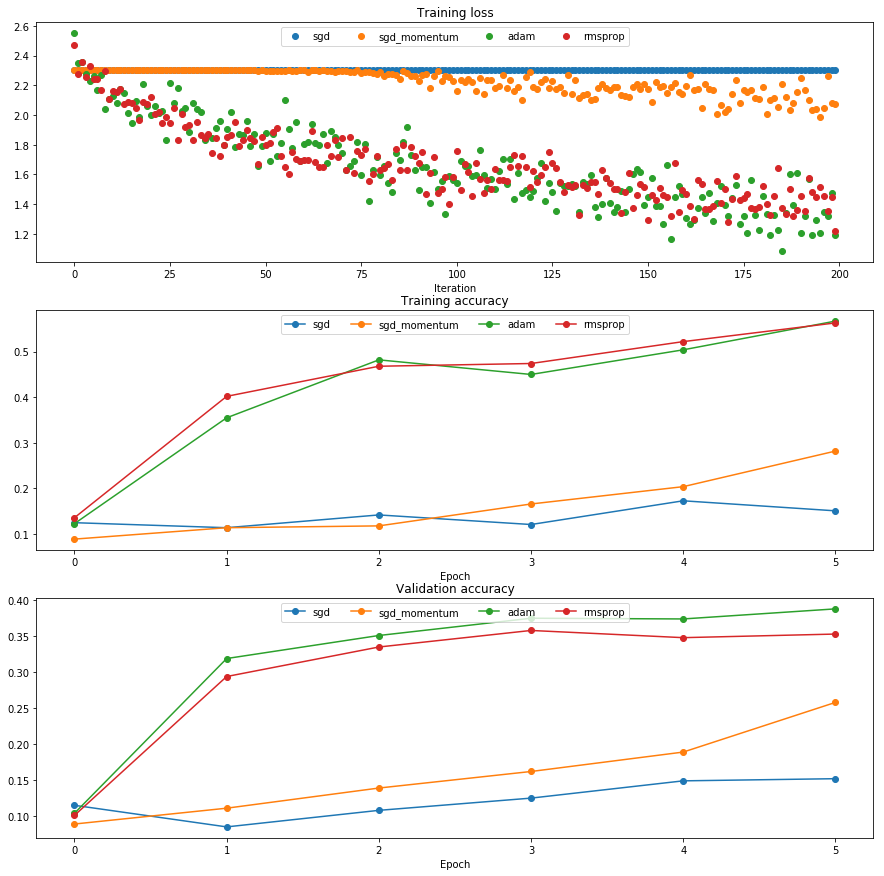

In [286]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()